In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
COMMON_PATH = "/home/louis/Dropbox/ConsultationSimpliphAI/AnalytiqueBourassaGit/UncertaintyForecasting/models/scripts/regression/"

In [3]:
import sys

sys.path.append("/home/louis/Dropbox/ConsultationSimpliphAI/AnalytiqueBourassaGit/UncertaintyForecasting/")

In [6]:
from uncertainty_forecasting.probabilitic_predictions.probabilistic_predictions_regression import probabilistic_predictions_regression

ImportError: cannot import name 'probabilistic_predictions_regression'

In [10]:
with open(COMMON_PATH + "predictions_seed_1.pkl", "rb") as file:
    data_seed_1 = pickle.load(file)
    
with open(COMMON_PATH + "predictions_seed_11.pkl", "rb") as file:
    data_seed_11 = pickle.load(file)

with open(COMMON_PATH + "predictions_seed_13.pkl", "rb") as file:
    data_seed_13 = pickle.load(file)

In [26]:
from scipy.special import erfinv
from math import sqrt, floor

def return_cdf(y_pred, y_true):

    y_mean = np.mean(y_pred, axis=1)
    error = np.std(y_pred, axis=1)

    n_values = 101
    p_values = np.linspace(0., 1, n_values)

    def calculate_empirical_cdf(y_mean, y_true, error, p_values):

        cdf_calculated = np.zeros(p_values.shape[0])
        cdf_limits = sqrt(2) * np.vectorize(erfinv)(2 * p_values - 1)

        for index_cdf, cdf_limit in enumerate(cdf_limits):
            for index_value, y_true_value in enumerate(y_true):
                if y_true_value <= y_mean[index_value] + error[index_value] * cdf_limit:
                    cdf_calculated[index_cdf] += 1

        cdf_calculated /= y_true.shape[0]
        relative_frequency = cdf_calculated[1:] / p_values[1:]

        return cdf_calculated, relative_frequency

    cdf_empirical, relative_frequency = calculate_empirical_cdf(y_mean, y_true, error, p_values)

    return p_values, cdf_empirical

In [27]:
p_true_1, cdf_forecast_1 = return_cdf(data_seed_1.values, data_seed_1.true_values)
p_true_11, cdf_forecast_11 = return_cdf(data_seed_11.values, data_seed_11.true_values) 
p_true_13, cdf_forecast_13 = return_cdf(data_seed_13.values, data_seed_13.true_values) 

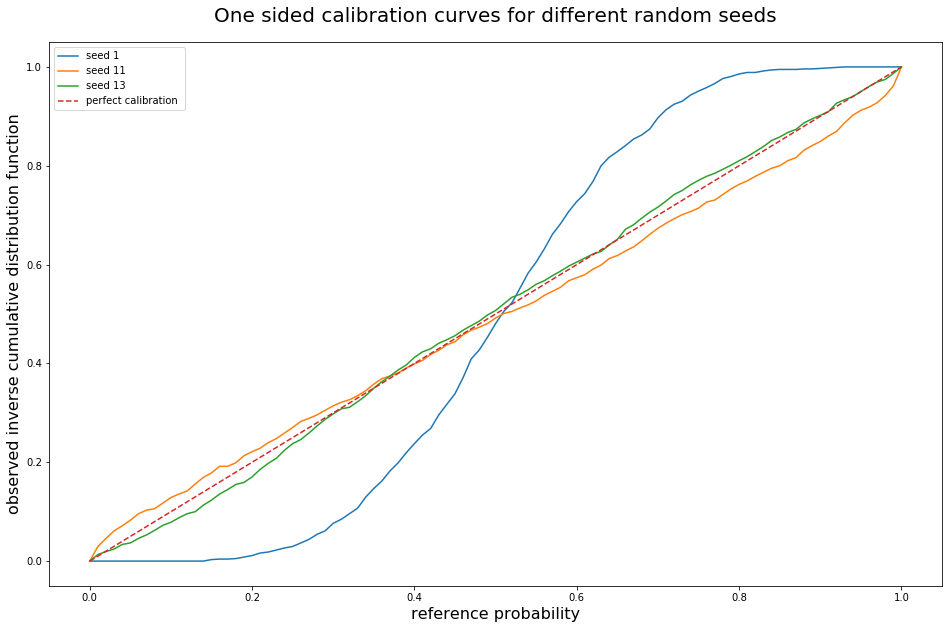

In [34]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,10))
plt.plot(p_true_1, cdf_forecast_1, label="seed 1")
plt.plot(p_true_11, cdf_forecast_11, label="seed 11")
plt.plot(p_true_13, cdf_forecast_13, label="seed 13")
plt.plot(p_true_13, p_true_13,"--",label="perfect calibration ")

plt.title("One sided calibration curves for different random seeds", size=20)
plt.xlabel("reference probability", size=16)
plt.ylabel("observed inverse cumulative distribution function", size=16)
plt.legend()
